[View in Colaboratory](https://colab.research.google.com/github/desirajusantosh/DS/blob/master/pascal_voc_l1.ipynb)

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
import sys
sys.path.append('../')
#!pip install fastai
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
!pip install https://github.com/fastai/fastai/archive/master.zip
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision
import torch
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

# check to make sure you set the device


     - 76.9MB 47.8MB/s
    100% |████████████████████████████████| 1.2MB 1.0MB/s 
    100% |████████████████████████████████| 1.4MB 891kB/s 
    100% |████████████████████████████████| 71kB 8.7MB/s 
    100% |████████████████████████████████| 256kB 4.5MB/s 
    70% |██████████████████████▌         | 14.7MB 41.8MB/s eta 0:00:01

    100% |████████████████████████████████| 20.8MB 67kB/s 
    100% |████████████████████████████████| 3.4MB 391kB/s 
    100% |████████████████████████████████| 112kB 9.8MB/s 
    100% |████████████████████████████████| 51kB 8.3MB/s 
    100% |████████████████████████████████| 61kB 6.4MB/s 
    100% |████████████████████████████████| 2.2MB 626kB/s 
    99% |████████████████████████████████| 542kB 46.4MB/s eta 0:00:01

    100% |████████████████████████████████| 552kB 2.2MB/s 
    100% |████████████████████████████████| 61kB 8.5MB/s 
    100% |████████████████████████████████| 4.1MB 320kB/s 
    100% |████████████████████████████████| 13.7MB 98kB/s 
    100% |████████████████████████████████| 92kB 9.6MB/s 
    100% |████████████████████████████████| 860kB 1.5MB/s 


In [5]:
ls

datalab/


In [6]:
!wget http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar

--2018-03-25 22:23:05--  http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar [following]
--2018-03-25 22:23:05--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  42.7MB/s    in 11s     

2018-03-25 22:23:16 (40.4 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]



In [7]:
!ls
!wget https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip

datalab  VOCtrainval_06-Nov-2007.tar
--2018-03-25 22:23:20--  https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1998182 (1.9M) [application/zip]
Saving to: ‘PASCAL_VOC.zip’

PASCAL_VOC.zip      100%[===================>]   1.91M  --.-KB/s    in 0.02s   

2018-03-25 22:23:20 (126 MB/s) - ‘PASCAL_VOC.zip’ saved [1998182/1998182]



In [8]:
ls

datalab/  PASCAL_VOC.zip  VOCtrainval_06-Nov-2007.tar


In [9]:
!tar -xf VOCtrainval_06-Nov-2007.tar
!ls VOCdevkit/VOC2007/

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject


In [10]:
!unzip PASCAL_VOC.zip
!mkdir data/pascal -p
!ls


Archive:  PASCAL_VOC.zip
   creating: PASCAL_VOC/
  inflating: PASCAL_VOC/pascal_test2007.json  
  inflating: PASCAL_VOC/pascal_train2007.json  
  inflating: PASCAL_VOC/pascal_train2012.json  
  inflating: PASCAL_VOC/pascal_val2007.json  
  inflating: PASCAL_VOC/pascal_val2012.json  
data	 PASCAL_VOC	 VOCdevkit
datalab  PASCAL_VOC.zip  VOCtrainval_06-Nov-2007.tar


In [11]:
!ls PASCAL_VOC/
!mv PASCAL_VOC/*.json VOCdevkit data/pascal/

pascal_test2007.json   pascal_train2012.json  pascal_val2012.json
pascal_train2007.json  pascal_val2007.json


In [12]:
ls data/pascal/


pascal_test2007.json   pascal_train2012.json  pascal_val2012.json
pascal_train2007.json  pascal_val2007.json    VOCdevkit/


In [13]:
PATH = Path('data/pascal')
list(PATH.iterdir())

[PosixPath('data/pascal/pascal_train2007.json'),
 PosixPath('data/pascal/pascal_val2012.json'),
 PosixPath('data/pascal/pascal_train2012.json'),
 PosixPath('data/pascal/pascal_test2007.json'),
 PosixPath('data/pascal/pascal_val2007.json'),
 PosixPath('data/pascal/VOCdevkit')]

In [14]:
!ls datalab/
!ls


data  datalab  PASCAL_VOC  PASCAL_VOC.zip  VOCtrainval_06-Nov-2007.tar


In [15]:
ls data

pascal/


In [12]:
ls

datalab/  PASCAL_VOC.zip  VOCtrainval_06-Nov-2007.tar


In [0]:
 rmdir PASCAL_VOC

In [42]:
PATH = Path('data/pascal')
list(PATH.iterdir())

[PosixPath('data/pascal/pascal_train2007.json'),
 PosixPath('data/pascal/pascal_val2012.json'),
 PosixPath('data/pascal/pascal_train2012.json'),
 PosixPath('data/pascal/pascal_test2007.json'),
 PosixPath('data/pascal/pascal_val2007.json'),
 PosixPath('data/pascal/VOCdevkit')]

In [29]:
ls data


pascal/


In [25]:
ls

datalab/               pascal_train2012.json  PASCAL_VOC.zip
pascal_test2007.json   pascal_val2007.json    VOCdevkit/
pascal_train2007.json  pascal_val2012.json    VOCtrainval_06-Nov-2007.tar


In [16]:
ls data/pascal

pascal_test2007.json   pascal_train2012.json  pascal_val2012.json
pascal_train2007.json  pascal_val2007.json    VOCdevkit/


In [17]:
ls data/pascal/VOCdevkit/VOC2007/


Annotations/  ImageSets/  JPEGImages/  SegmentationClass/  SegmentationObject/


In [40]:
PATH = Path('data/pascal')
list(PATH.iterdir())

[]

In [42]:
ls


data/     PASCAL_VOC/     PASCAL_VOC.zip.1  VOCtrainval_06-Nov-2007.tar
datalab/  PASCAL_VOC.zip  VOCdevkit/        VOCtrainval_06-Nov-2007.tar.1


In [0]:
ls data/pascal/

In [0]:
!mv VOCdevkit/ data/pascal/

In [45]:
ls data/pascal/

pascal_test2007.json   pascal_train2012.json  pascal_val2012.json
pascal_train2007.json  pascal_val2007.json    VOCdevkit/


In [18]:
ls data/pascal

pascal_test2007.json   pascal_train2012.json  pascal_val2012.json
pascal_train2007.json  pascal_val2007.json    VOCdevkit/


In [51]:
PATH = Path('data/pascal')
list(PATH.iterdir())

[PosixPath('data/pascal/pascal_test2007.json'),
 PosixPath('data/pascal/pascal_val2007.json'),
 PosixPath('data/pascal/pascal_train2012.json'),
 PosixPath('data/pascal/pascal_val2012.json'),
 PosixPath('data/pascal/pascal_train2007.json'),
 PosixPath('data/pascal/VOCdevkit'),
 PosixPath('data/pascal/VOCtrainval_06-Nov-2007.tar')]

In [19]:
trn_j = json.load((PATH/'pascal_train2007.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [20]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

In [21]:
trn_j[ANNOTATIONS][:2]


[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]}]

In [22]:
trn_j[CATEGORIES][:4]


[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 3, 'name': 'bird', 'supercategory': 'none'},
 {'id': 4, 'name': 'boat', 'supercategory': 'none'}]

In [0]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = dict((o[ID], o['name']) for o in trn_j[CATEGORIES])
trn_fns = dict((o[ID], o[FILE_NAME]) for o in trn_j[IMAGES])
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [24]:
list((PATH/'VOCdevkit'/'VOC2007').iterdir())


[PosixPath('data/pascal/VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/Annotations'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/ImageSets'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages')]

In [0]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'


In [26]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/009121.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/003280.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/006458.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/004239.jpg'),
 PosixPath('data/pascal/VOCdevkit/VOC2007/JPEGImages/005136.jpg')]

In [27]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('000012.jpg', 12)

In [28]:
trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

2501

In [29]:
im_a = trn_anno[im0_d[ID]]; im_a


[(array([ 96, 155, 269, 350]), 7)]

In [30]:
im0_a = im_a[0]; im0_a


(array([ 96, 155, 269, 350]), 7)

In [31]:
cats[7]


'car'

In [32]:
trn_anno[17]
trn_anno.items()

dict_items([(12, [(array([ 96, 155, 269, 350]), 7)]), (17, [(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]), (23, [(array([229,   8, 499, 244]), 2), (array([219, 229, 499, 333]), 2), (array([  0,   1, 368, 116]), 15), (array([  1,   2, 461, 242]), 15), (array([  0, 224, 485, 333]), 15)]), (26, [(array([124,  89, 211, 336]), 7)]), (32, [(array([ 77, 103, 182, 374]), 1), (array([ 87, 132, 122, 196]), 1), (array([179, 194, 228, 212]), 15), (array([188,  25, 237,  43]), 15)]), (33, [(array([106,   8, 262, 498]), 1), (array([199, 420, 225, 481]), 1), (array([187, 324, 222, 410]), 1)]), (34, [(array([166, 115, 399, 359]), 19), (array([152, 140, 228, 332]), 19)]), (35, [(array([ 95,   0, 360, 190]), 15), (array([ 97, 217, 317, 464]), 15)]), (36, [(array([ 78,  26, 343, 318]), 12)]), (42, [(array([ 31, 262, 294, 499]), 19), (array([ 35,   0, 298, 234]), 19)]), (44, [(array([  0,   0, 329, 369]), 9), (array([100,  98, 212, 311]), 8)]), (47, [(array([  0,  14, 311, 458]), 

In [33]:
cats[15],cats[13]


('person', 'horse')

In [0]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1],a[2]-a[0]])


In [0]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])
#open_image(IMG_PATH/im0_d[FILE_NAME])
#im = open_image('data/pascal/VOCdevkit/VOC2007/JPEGImages/000012.jpg')

In [0]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [0]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [0]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [0]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

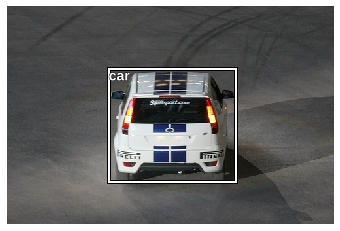

In [40]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [0]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann: 
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [0]:
def draw_idx(i):
    im_a = trn_anno[i] # returns binding box values and the object class for image with id i
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


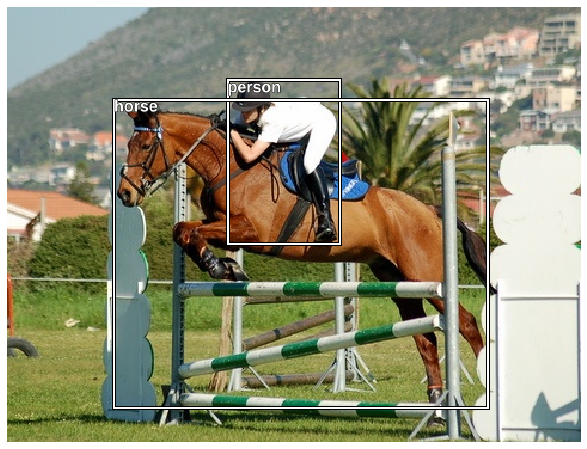

In [43]:
draw_idx(17)


In [0]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]
  

In [0]:
#print (b)
#a,b = trn_anno.items()
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

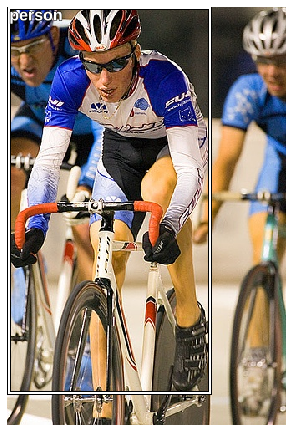

In [46]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[23]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

In [0]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [0]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
                   'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn','cat'])
df.to_csv(CSV, index=False)

In [0]:
f_model = resnet34
sz=224
bs=64

In [0]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms)

In [51]:
md.trn_dl

In [0]:
x,y=next(iter(md.val_dl))

In [53]:
x[:2]


( 0 , 0 ,.,.) = 
  3.9125e-01  4.3014e-01  4.8172e-01  ...   1.7518e-01  3.2367e-01  4.0783e-01
  5.1636e-01  4.4973e-01  5.9202e-01  ...   1.7386e-01  2.3164e-01  3.6722e-01
  5.4416e-01  5.7267e-01  7.0099e-01  ...   5.7682e-02  2.2320e-01  3.5455e-01
                 ...                   ⋱                   ...                
  1.4604e+00  1.5029e+00  1.5195e+00  ...   7.8030e-01  5.6716e-01 -6.3922e-01
  9.3739e-01  1.0210e+00  1.1599e+00  ...   1.1281e+00  1.0895e+00  4.5857e-01
  5.8584e-01  4.5245e-01  2.9605e-01  ...   1.0003e+00  9.2495e-01  8.2729e-01

( 0 , 1 ,.,.) = 
  2.4041e-01  3.1444e-01  4.1422e-01  ...   3.3162e-01  4.7052e-01  5.4764e-01
  3.9737e-01  4.2156e-01  5.7304e-01  ...   3.3887e-01  3.8799e-01  5.2038e-01
  5.2462e-01  5.8245e-01  6.7485e-01  ...   2.5190e-01  4.0003e-01  5.1502e-01
                 ...                   ⋱                   ...                
  1.4721e+00  1.5019e+00  1.5077e+00  ...   6.0917e-01  4.4337e-01 -7.3978e-01
  8.4169e-01  9.

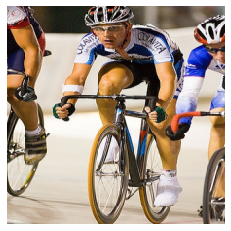

In [54]:
show_img(md.val_ds.denorm(to_np(x))[0]);

In [55]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 31405456.61it/s]


In [56]:
lrf=learn.lr_find(1e-5,100)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 25/32 [00:17<00:05,  1.39it/s, loss=11.5]

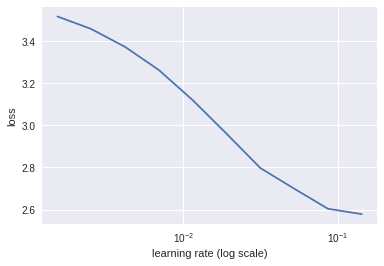

In [57]:
learn.sched.plot()

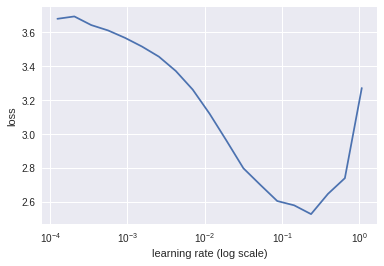

In [58]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [0]:
lr = 2e-2

In [60]:
learn.fit(lr, 1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 44%|████▍     | 14/32 [00:09<00:11,  1.55it/s, loss=1.57]


Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy   
    0      1.324838   0.699125   0.826923  



[0.6991247, 0.8269230797886848]

In [0]:
lrs = np.array([lr/1000,lr/100,lr])

In [0]:
learn.freeze_to(-2)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 84%|████████▍ | 27/32 [00:20<00:03,  1.33it/s, loss=3.54]

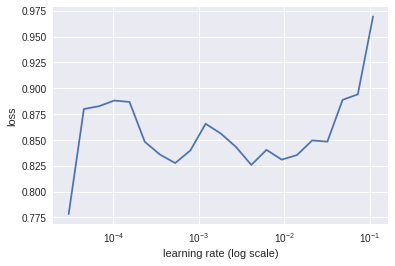

In [63]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [0]:
learn.unfreeze()

In [65]:
learn.fit(lrs/5, 1, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

  9%|▉         | 3/32 [00:05<00:56,  1.95s/it, loss=0.956]


Exception in thread Thread-9:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy   
    0      0.851837   0.569926   0.821514  
    1      0.60224    0.557282   0.815655  



[0.55728155, 0.8156550452113152]

In [0]:
learn.save('clas_one')

In [0]:
learn.load('clas_one')

In [0]:
x,y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x,preds = to_np(x),to_np(probs)
preds = np.argmax(preds, -1)

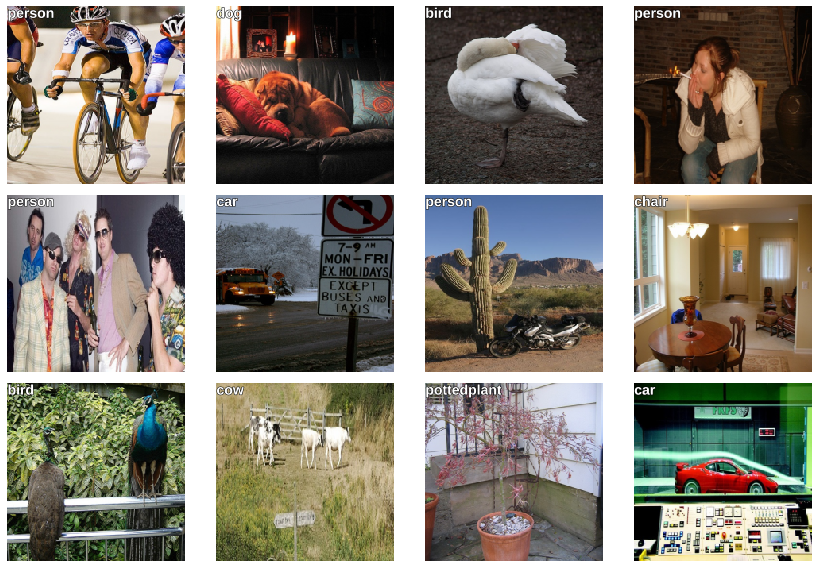

In [69]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(x)[i]
    b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()

In [0]:
BB_CSV = PATH/'tmp/bb.csv'

In [0]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'bbox': bbs}, columns=['fn','bbox'])
df.to_csv(BB_CSV, index=False)

In [72]:
BB_CSV.open().readlines()[:5]

['fn,bbox\n',
 '000012.jpg,96 155 269 350\n',
 '000017.jpg,77 89 335 402\n',
 '000023.jpg,1 2 461 242\n',
 '000026.jpg,124 89 211 336\n']

In [0]:
f_model=resnet34
sz=224
bs=64

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True)

In [0]:
x,y=next(iter(md.val_dl))

In [76]:
ima=md.val_ds.denorm(to_np(x))[0]
b = bb_hw(to_np(y[0])); b

array([ 49.,   0., 131., 205.], dtype=float32)

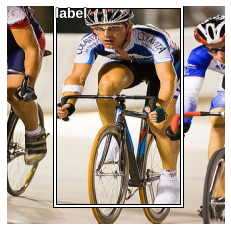

In [78]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], 'label')

In [0]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088,4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [80]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 56, 

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 25/32 [00:15<00:04,  1.63it/s, loss=472]

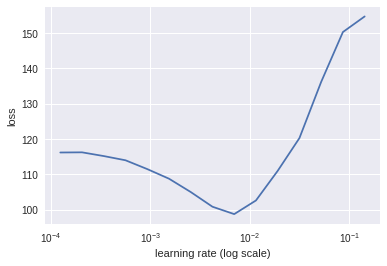

In [81]:
learn.lr_find(1e-5,100)
learn.sched.plot(5)

In [0]:
lr = 2e-3

In [83]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

  0%|          | 0/32 [00:00<?, ?it/s]


Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   
    0      49.412794  35.237732 
    1      38.105177  28.945097 
    2      31.632734  27.819778 



[27.819778]

In [0]:
lrs = np.array([lr/100,lr/10,lr])

In [0]:
learn.freeze_to(-2)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   
    0      63.67535   7957688025612288.0



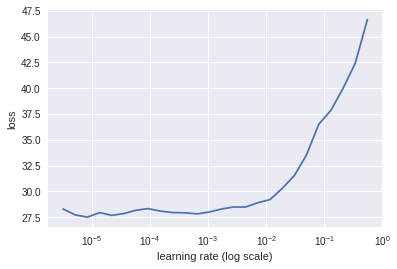

In [86]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [87]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   
    0      26.083759  23.197538 
    1      22.324739  21.751474 
    2      18.072406  20.636868 



[20.636868]

In [0]:
learn.freeze_to(-3)

In [89]:
learn.fit(lrs, 1, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   
    0      15.86431   21.306152 
    1      14.421517  20.434216 



[20.434216]

In [0]:
learn.save('reg4')

In [0]:
learn.load('reg4')

In [0]:
x,y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

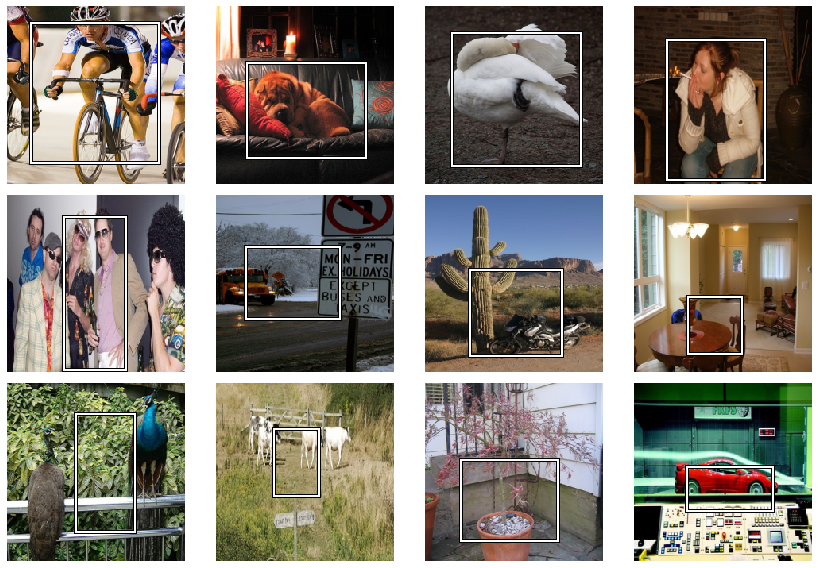

In [93]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()